<a href="https://colab.research.google.com/github/Malu2810/-Improving-vessel-performance-using-deep-learning/blob/main/speed_predd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ship=pd.read_csv('/content/emet_W1_1999 ship.csv')

In [ ]:
ship.head()

,cruiseid,year,si,month_gmt,day_gmt,time_gmt,lat,lon,depth_w,depth_cs,...,temp_ss1,temp_ss3,temp_ss5,cond_mM,sal_ss3,speed_trim,course,course_trim,yrday_gmt,numb_records
0,EN319,1999,T.Durbin,2,21,0.0,41.4921,-71.4187,0.0,nd,...,4.5,nd,nd,nd,nd,0.1,237.0,152.0,52.00019,nd
1,EN319,1999,T.Durbin,2,21,1.0,41.4922,-71.4187,0.0,nd,...,4.5,nd,nd,nd,nd,0.1,200.0,42.0,52.00088,nd
2,EN319,1999,T.Durbin,2,21,2.0,41.4916,-71.4185,0.0,nd,...,4.5,nd,nd,nd,nd,0.2,213.0,50.0,52.00159,nd
3,EN319,1999,T.Durbin,2,21,3.0,41.4921,-71.4187,0.0,nd,...,4.5,nd,nd,nd,nd,0.2,200.0,335.0,52.00228,nd
4,EN319,1999,T.Durbin,2,21,4.0,41.4922,-71.4187,0.0,nd,...,4.5,nd,nd,nd,nd,0.1,206.0,12.0,52.00299,nd


In [ ]:
ship.columns

Index(['cruiseid', 'year', 'si', 'month_gmt', 'day_gmt', 'time_gmt', 'lat',
       'lon', 'depth_w', 'depth_cs', 'wind_speed_c', 'wind_dir_c',
       'wind_speed_r', 'wind_dir_r', 'temp_air', 'humidity', 'press_bar',
       'precip_level', 'ed_sw', 'ed_lw', 'temp_ss1', 'temp_ss3', 'temp_ss5',
       'cond_mM', 'sal_ss3', 'speed_trim', 'course', 'course_trim',
       'yrday_gmt', 'numb_records'],
      dtype='object')

In [ ]:
ship.dtypes

cruiseid         object
year              int64
si               object
month_gmt         int64
day_gmt           int64
time_gmt        float64
lat             float64
lon             float64
depth_w         float64
depth_cs         object
wind_speed_c    float64
wind_dir_c      float64
wind_speed_r    float64
wind_dir_r      float64
temp_air        float64
humidity        float64
press_bar       float64
precip_level     object
ed_sw           float64
ed_lw           float64
temp_ss1        float64
temp_ss3         object
temp_ss5         object
cond_mM          object
sal_ss3          object
speed_trim      float64
course          float64
course_trim     float64
yrday_gmt       float64
numb_records     object
dtype: object

In [ ]:
ship.isnull().sum()

cruiseid        0
year            0
si              0
month_gmt       0
day_gmt         0
time_gmt        0
lat             0
lon             0
depth_w         0
depth_cs        0
wind_speed_c    0
wind_dir_c      0
wind_speed_r    0
wind_dir_r      0
temp_air        0
humidity        0
press_bar       0
precip_level    0
ed_sw           0
ed_lw           0
temp_ss1        0
temp_ss3        0
temp_ss5        1
cond_mM         1
sal_ss3         1
speed_trim      1
course          1
course_trim     1
yrday_gmt       1
numb_records    1
dtype: int64

In [ ]:
mode_value = ship[['depth_w','depth_cs','wind_speed_c','wind_dir_c','wind_speed_r','wind_dir_r','temp_air','humidity','press_bar','precip_level','ed_sw','ed_lw','temp_ss1','temp_ss3','temp_ss5','cond_mM','sal_ss3','speed_trim','course','course_trim','yrday_gmt','numb_records']].mode()

# Replace NaN values in 'Column1' with the mode value
ship[['depth_w','depth_cs','wind_speed_c','wind_dir_c','wind_speed_r','wind_dir_r','temp_air','humidity','press_bar','precip_level','ed_sw','ed_lw','temp_ss1','temp_ss3','temp_ss5','cond_mM','sal_ss3','speed_trim','course','course_trim','yrday_gmt','numb_records']].fillna(mode_value, inplace=True)

<ipython-input-9-4311000db574>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship[['depth_w','depth_cs','wind_speed_c','wind_dir_c','wind_speed_r','wind_dir_r','temp_air','humidity','press_bar','precip_level','ed_sw','ed_lw','temp_ss1','temp_ss3','temp_ss5','cond_mM','sal_ss3','speed_trim','course','course_trim','yrday_gmt','numb_records']].fillna(mode_value, inplace=True)


In [ ]:
ship.isnull().sum()

cruiseid        0
year            0
si              0
month_gmt       0
day_gmt         0
time_gmt        0
lat             0
lon             0
depth_w         0
depth_cs        0
wind_speed_c    0
wind_dir_c      0
wind_speed_r    0
wind_dir_r      0
temp_air        0
humidity        0
press_bar       0
precip_level    0
ed_sw           0
ed_lw           0
temp_ss1        0
temp_ss3        0
temp_ss5        1
cond_mM         1
sal_ss3         1
speed_trim      1
course          1
course_trim     1
yrday_gmt       1
numb_records    1
dtype: int64

<ipython-input-11-08362ddd1b6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ship.corr()


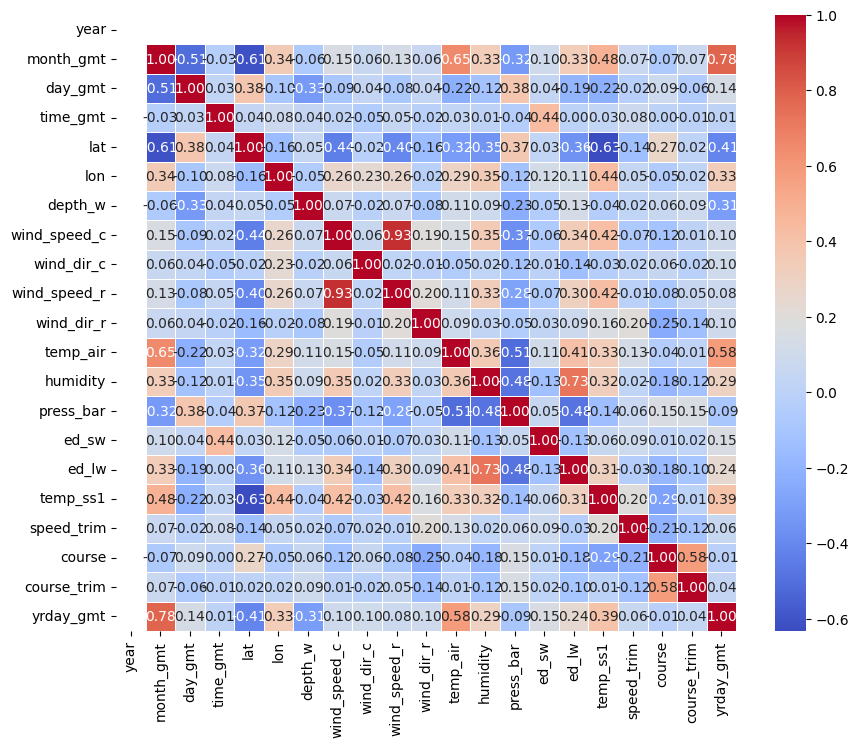

In [ ]:
correlation_matrix = ship.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

In [ ]:
ship.drop(['lon', 'lat','day_gmt','wind_dir_c','wind_dir_r','press_bar'], axis=1)

,cruiseid,year,si,month_gmt,time_gmt,depth_w,depth_cs,wind_speed_c,wind_speed_r,temp_air,...,temp_ss1,temp_ss3,temp_ss5,cond_mM,sal_ss3,speed_trim,course,course_trim,yrday_gmt,numb_records
0,EN319,1999,T.Durbin,2,0.00,0.0,nd,0.6,0.6,3.5,...,4.5,nd,nd,nd,nd,0.1,237.0,152.0,52.00019,nd
1,EN319,1999,T.Durbin,2,1.00,0.0,nd,0.7,0.7,3.3,...,4.5,nd,nd,nd,nd,0.1,200.0,42.0,52.00088,nd
2,EN319,1999,T.Durbin,2,2.00,0.0,nd,0.8,0.8,3.1,...,4.5,nd,nd,nd,nd,0.2,213.0,50.0,52.00159,nd
3,EN319,1999,T.Durbin,2,3.00,0.0,nd,1.2,1.3,2.9,...,4.5,nd,nd,nd,nd,0.2,200.0,335.0,52.00228,nd
4,EN319,1999,T.Durbin,2,4.00,0.0,nd,1.2,1.3,2.9,...,4.5,nd,nd,nd,nd,0.1,206.0,12.0,52.00299,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43306,EN321,1999,D.Gifford,4,2004.06,0.0,nd,2.7,2.6,7.3,...,6.4,nd,nd,nd,nd,0.2,345.0,256.0,91.83615,nd
43307,EN321,1999,D.Gifford,4,2005.05,0.0,nd,2.6,2.8,7.2,...,6.5,nd,nd,nd,nd,0.3,355.0,171.0,91.83684,nd
43308,EN321,1999,D.Gifford,4,2006.04,0.0,nd,2.6,3.0,6.9,...,6.5,nd,nd,nd,nd,0.5,8.0,154.0,91.83753,nd
43309,EN321,1999,D.Gifford,4,2007.05,0.0,nd,2.3,2.9,6.8,...,6.6,nd,nd,nd,nd,0.6,21.0,148.0,91.83823,nd


In [ ]:
ship.columns

Index(['cruiseid', 'year', 'si', 'month_gmt', 'day_gmt', 'time_gmt', 'lat',
       'lon', 'depth_w', 'depth_cs', 'wind_speed_c', 'wind_dir_c',
       'wind_speed_r', 'wind_dir_r', 'temp_air', 'humidity', 'press_bar',
       'precip_level', 'ed_sw', 'ed_lw', 'temp_ss1', 'temp_ss3', 'temp_ss5',
       'cond_mM', 'sal_ss3', 'speed_trim', 'course', 'course_trim',
       'yrday_gmt', 'numb_records'],
      dtype='object')

In [ ]:
ship.dtypes

cruiseid         object
year              int64
si               object
month_gmt         int64
day_gmt           int64
time_gmt        float64
lat             float64
lon             float64
depth_w         float64
depth_cs         object
wind_speed_c    float64
wind_dir_c      float64
wind_speed_r    float64
wind_dir_r      float64
temp_air        float64
humidity        float64
press_bar       float64
precip_level     object
ed_sw           float64
ed_lw           float64
temp_ss1        float64
temp_ss3         object
temp_ss5         object
cond_mM          object
sal_ss3          object
speed_trim      float64
course          float64
course_trim     float64
yrday_gmt       float64
numb_records     object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'ship' is your DataFrame
object_cols = ship.select_dtypes(include='object').columns
le = LabelEncoder()

for col in object_cols:
    # Convert column to string to handle mixed data types
    ship[col] = ship[col].astype(str)

    # Use LabelEncoder
    ship[col] = le.fit_transform(ship[col])

# Now, the object columns should be encoded successfully

In [ ]:
ship.dtypes

cruiseid          int64
year              int64
si                int64
month_gmt         int64
day_gmt           int64
time_gmt        float64
lat             float64
lon             float64
depth_w         float64
depth_cs          int64
wind_speed_c    float64
wind_dir_c      float64
wind_speed_r    float64
wind_dir_r      float64
temp_air        float64
humidity        float64
press_bar       float64
precip_level      int64
ed_sw           float64
ed_lw           float64
temp_ss1        float64
temp_ss3          int64
temp_ss5          int64
cond_mM           int64
sal_ss3           int64
speed_trim      float64
course          float64
course_trim     float64
yrday_gmt       float64
numb_records      int64
dtype: object

In [ ]:
ship.dropna(inplace=True)

In [ ]:
# Identify float columns
float_cols = ship.select_dtypes(include='float').columns

# Convert float columns to int
ship[float_cols] = ship[float_cols].astype(int)

In [ ]:
ship.dtypes

cruiseid        int64
year            int64
si              int64
month_gmt       int64
day_gmt         int64
time_gmt        int64
lat             int64
lon             int64
depth_w         int64
depth_cs        int64
wind_speed_c    int64
wind_dir_c      int64
wind_speed_r    int64
wind_dir_r      int64
temp_air        int64
humidity        int64
press_bar       int64
precip_level    int64
ed_sw           int64
ed_lw           int64
temp_ss1        int64
temp_ss3        int64
temp_ss5        int64
cond_mM         int64
sal_ss3         int64
speed_trim      int64
course          int64
course_trim     int64
yrday_gmt       int64
numb_records    int64
dtype: object

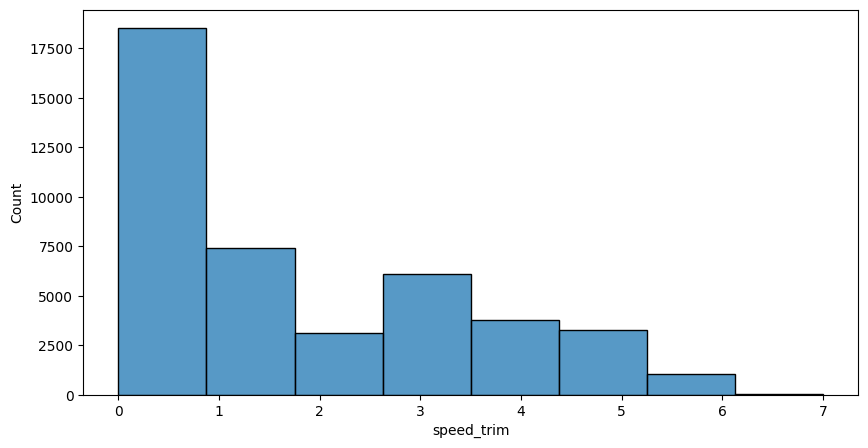

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(ship['speed_trim'], bins=8)
plt.show()

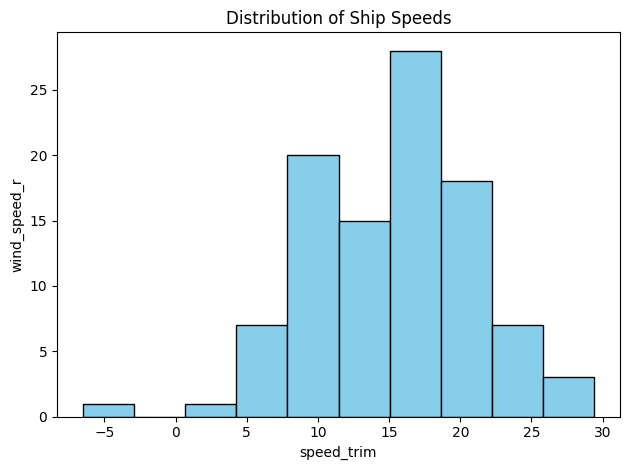

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming ship_speeds is your dataset
ship_speeds = np.random.normal(15, 5, 100)  # Example data (mean=15, std=5)

# Plotting the histogram
plt.hist(ship_speeds, bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('speed_trim')
plt.ylabel('wind_speed_r')
plt.title('Distribution of Ship Speeds')

# Adjusting layout and figure size
plt.tight_layout()

# Display the plot
plt.show()


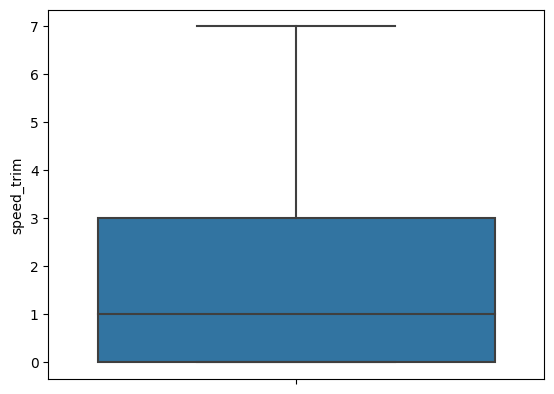

In [ ]:
sns.boxplot(data=ship, y='speed_trim')
plt.show()

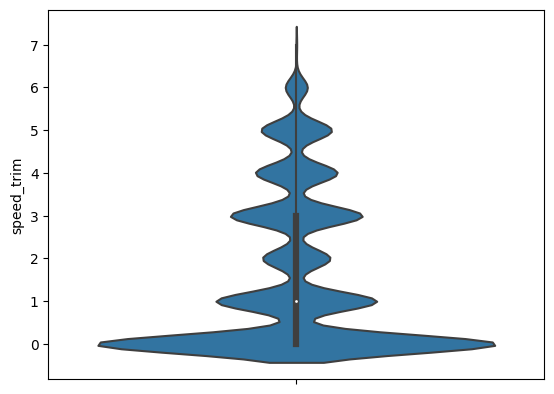

In [ ]:
sns.violinplot(data=ship, y='speed_trim')
plt.show()

In [ ]:
ship.to_csv("Your processed data.csv",index="false")


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame named 'df' after performing EDA
# Replace 'your_processed_data.csv' with the desired filename
data = pd.read_csv('/content/Your processed data.csv')

# Extract features and labels
X = data.drop('speed_trim', axis=1).values
y = data['speed_trim'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Reshape features for a 1D input (since it's tabular data)
X = X.reshape(-1, X.shape[1])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [ ]:
 #Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

# Make predictions
predictions = model.predict(X_test)


Epoch 1/10
1083/1083 [==============================] - 4s 3ms/step - loss: 1.3935 - mae: 0.8864 - val_loss: 0.7096 - val_mae: 0.6176
Epoch 2/10
1083/1083 [==============================] - 3s 2ms/step - loss: 0.5924 - mae: 0.5575 - val_loss: 0.4923 - val_mae: 0.5130
Epoch 3/10
1083/1083 [==============================] - 3s 3ms/step - loss: 0.4325 - mae: 0.4705 - val_loss: 0.3890 - val_mae: 0.4509
Epoch 4/10
1083/1083 [==============================] - 3s 3ms/step - loss: 0.3546 - mae: 0.4256 - val_loss: 0.3315 - val_mae: 0.4176
Epoch 5/10
1083/1083 [==============================] - 3s 2ms/step - loss: 0.3133 - mae: 0.4017 - val_loss: 0.2881 - val_mae: 0.3803
Epoch 6/10
1083/1083 [==============================] - 2s 2ms/step - loss: 0.2849 - mae: 0.3834 - val_loss: 0.2731 - val_mae: 0.3763
Epoch 7/10
1083/1083 [==============================] - 3s 2ms/step - loss: 0.2662 - mae: 0.3703 - val_loss: 0.2462 - val_mae: 0.3582
Epoch 8/10
1083/1083 [==============================] - 4s 3ms

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

# Make predictions
predictions = model.predict(X_test)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
accuracy_percentage = accuracy * 100
print(f'Loss: {loss}, Accuracy: {accuracy_percentage:.2f}%')

# Make predictions
predictions = model.predict(X_test)

271/271 [==============================] - 0s 2ms/step - loss: 0.2317 - mae: 0.3474
Mean Absolute Error: 0.34742286801338196
271/271 [==============================] - 1s 4ms/step - loss: 0.2317 - mae: 0.3474
Loss: 0.23170091211795807, Accuracy: 34.74%
271/271 [==============================] - 0s 2ms/step
